In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import molsysmt as msm
import openinterface as oin
from matplotlib import pyplot as plt

In [5]:
molecular_system=msm.convert("HIF1_HS_Mod.pdb")

In [6]:
msm.info(molecular_system)

form,n atoms,n groups,n components,n chains,n molecules,n entities,n frames
molsysmt.MolSys,5639,706,2,2,2,1,1


In [7]:
buried_factors_receptor, buried_factors_ligand, labels_receptor, labels_ligand = \
oi.buried_factors(molecular_system, 'component.index==0', 'component.index==1')

In [8]:
contact_map, labels_receptor, labels_ligand = \
oi.contact_map(molecular_system,'component.index==0', 'component.index==1')

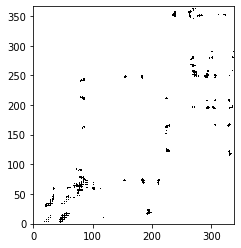

In [9]:
plt.imshow(contact_map[0], cmap='Greys', origin='lower')
plt.show()

In [10]:
connectivity_receptor, connectivity_ligand, labels_receptor, labels_ligand = \
oi.connectivity(molecular_system, 'component.index==0', 'component.index==1')

In [11]:
for ii,jj,kk in zip(labels_ligand, connectivity_ligand[0], buried_factors_ligand[0]):
    print(ii,jj,kk)

LYS-11@367 0 0.0
LYS-12@368 0 0.0
ILE-13@369 0 0.0
SER-14@370 0 0.0
SER-15@371 0 0.0
GLU-16@372 0 0.0
ARG-17@373 0 0.0
ARG-18@374 0 0.0
LYS-19@375 0 0.0
GLU-20@376 0 0.0
LYS-21@377 0 0.0
SER-22@378 0 0.0
ARG-23@379 0 0.0
ASP-24@380 0 0.0
ALA-25@381 0 0.0
ALA-26@382 0 0.0
ARG-27@383 0 0.0
SER-28@384 0 0.0
ARG-29@385 2 0.026978440499308906
ARG-30@386 1 0.16015468826334703
SER-31@387 1 0.0
LYS-32@388 4 0.09389552490578873
GLU-33@389 10 0.11610775317860615
SER-34@390 4 0.0
GLU-35@391 3 0.0
VAL-36@392 9 0.8839163669165627
PHE-37@393 12 0.8227272790906263
TYR-38@394 2 0.0
GLU-39@395 5 0.14560089549474683
LEU-40@396 14 0.7782863527917327
ALA-41@397 3 0.0
HIS-42@398 2 0.0
GLN-43@399 10 0.36382676745099174
LEU-44@400 10 0.0
PRO-45@401 13 0.2009771245283028
LEU-46@402 6 0.29503339109102533
PRO-47@403 2 0.0
HIS-48@404 0 0.0
ASN-49@405 0 0.0
VAL-50@406 0 0.0
SER-51@407 0 0.0
SER-52@408 0 0.0
HIS-53@409 0 0.0
LEU-54@410 0 0.0
ASP-55@411 4 0.3838549510282655
LYS-56@412 9 0.5317813337812693
ALA-57@41

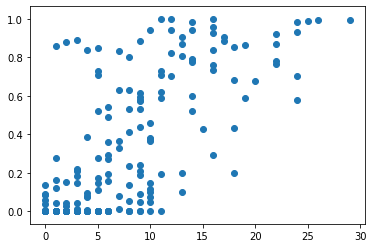

In [12]:
plt.scatter(connectivity_ligand[0], buried_factors_ligand[0])

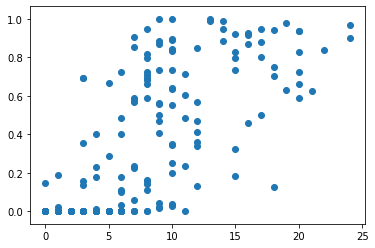

In [13]:
plt.scatter(connectivity_receptor[0], buried_factors_receptor[0])

In [14]:
oi.sasa_buried(molecular_system, 'component.index==0', 'component.index==1')

Quantity(value=array([88.472534], dtype=float32), unit=nanometer**2)